# Importing the libraries

In [144]:
import warnings
warnings.filterwarnings('ignore')

#libraries for preprocessing
import numpy as np 
import pandas as pd 

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#libraries for data based / driven models 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #for simple exponential smoothning
from statsmodels.tsa.holtwinters import Holt #for holts/Double exponential model
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

#
#libraries for ploting ACF and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots 

#libraries for checking the stationarity
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.statespace.tools import diff as diff

#libraries for ARMA model
from statsmodels.tsa.arima_model import ARMA

#libraries for model driven models (ARIMA)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


# Importing the data

In [145]:
gold_price = pd.read_csv('Gold_data.csv' , parse_dates=['date'])

In [146]:
gold_price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


# Preprocessing the data 

In [147]:
gold_price['date']=pd.to_datetime(gold_price['date'])

In [148]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [149]:
gold_price = gold_price.set_index('date' , drop=True)

In [150]:
gold_price

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [151]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [152]:
gold_price.shape

(2182, 1)

# Checking for any missing dates in our data 

In [153]:
print(pd.date_range(start='2016-01-01' , end='2021-12-21').difference(gold_price.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


since from above output we get to know that there are no missing dates

# Checking for the null values 

In [154]:
print('missing_price :',gold_price.isna().sum())

missing_price : price    0
dtype: int64


there are null values

# Checking for the outlayers

<AxesSubplot:xlabel='date', ylabel='price'>

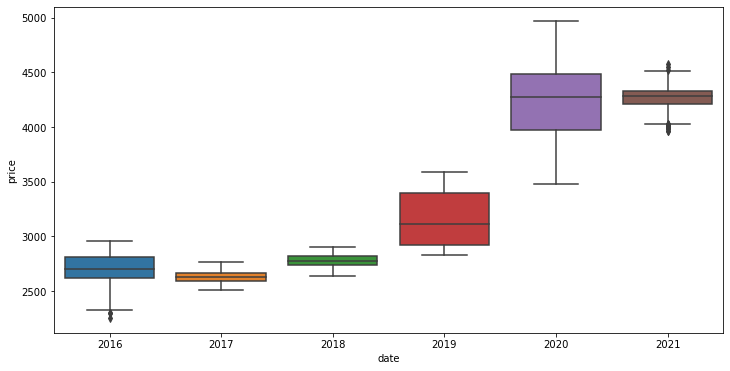

In [155]:
fig , ax=plt.subplots(figsize=(12,6))
sns.boxplot(data=gold_price , x=gold_price.index.year , y='price' , ax=ax)

# Data Understanding 

# EDA==>Exploratory data analysis

Text(0, 0.5, 'Price')

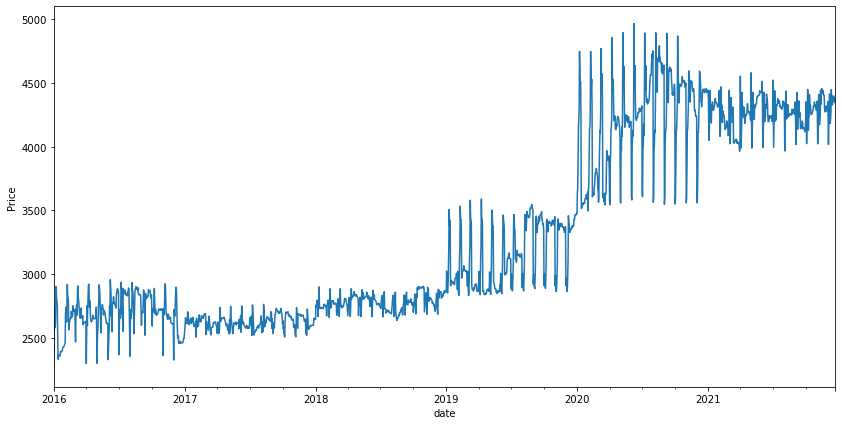

In [156]:
#day wise 
plt.figure(figsize=(14,7))
gold_price.price.plot()
plt.ylabel('Price')

Text(0, 0.5, 'Price')

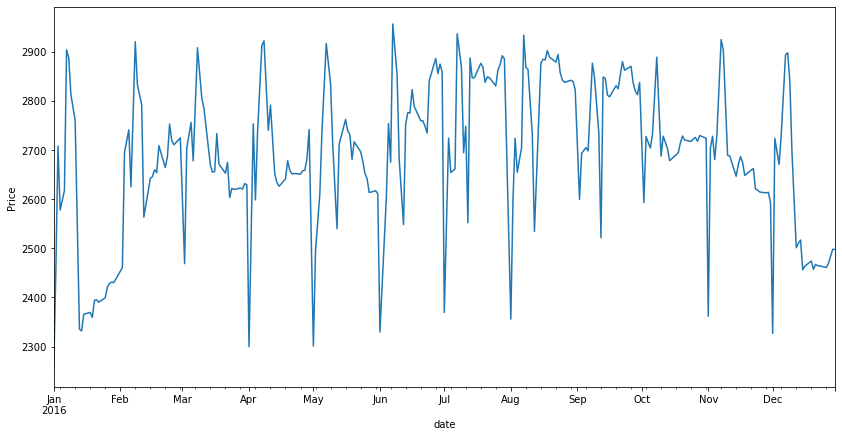

In [157]:
#day wise
#considering only one year
plt.figure(figsize=(14,7))
gold_price.price[:365].plot()
plt.ylabel('Price')

Text(0.5, 0, 'Based on Anually')

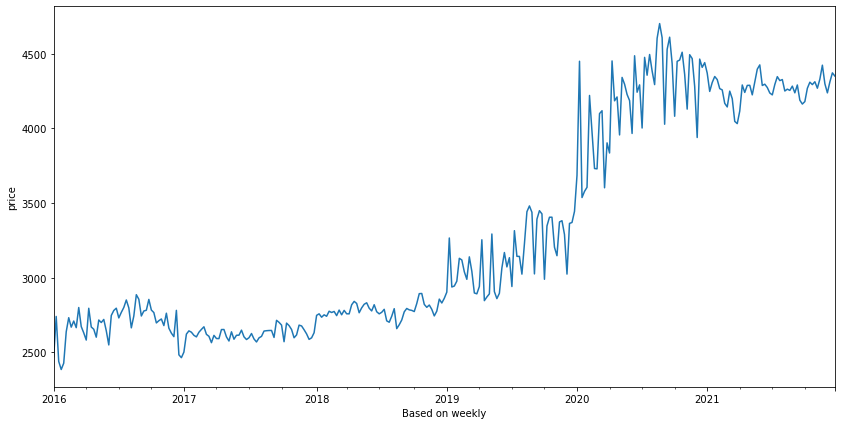

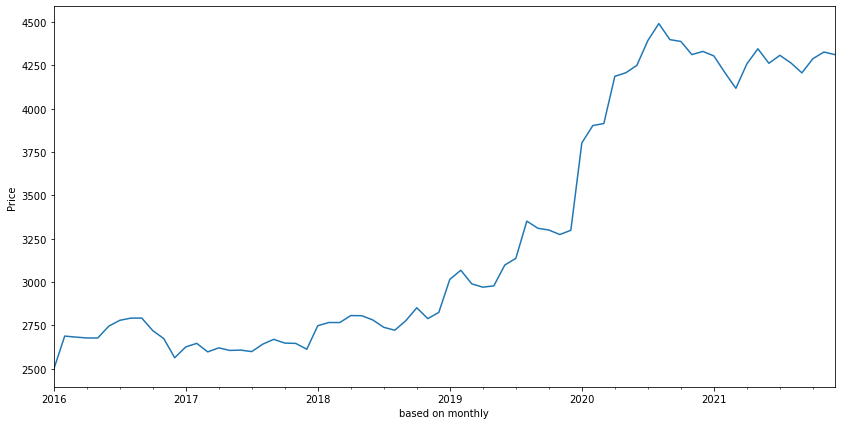

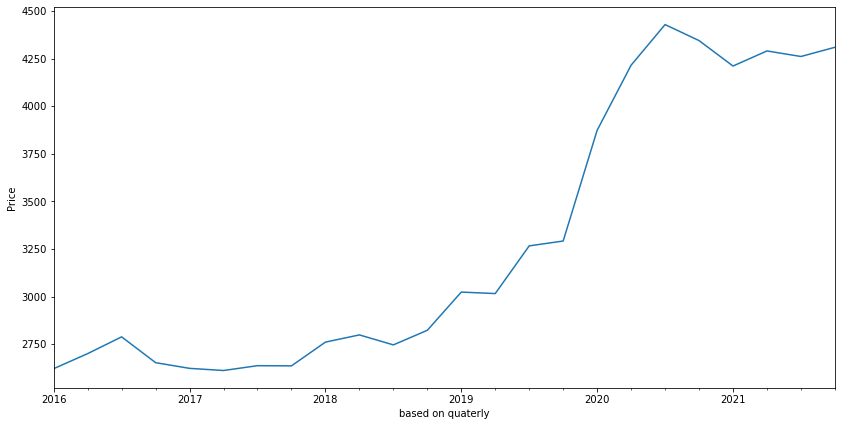

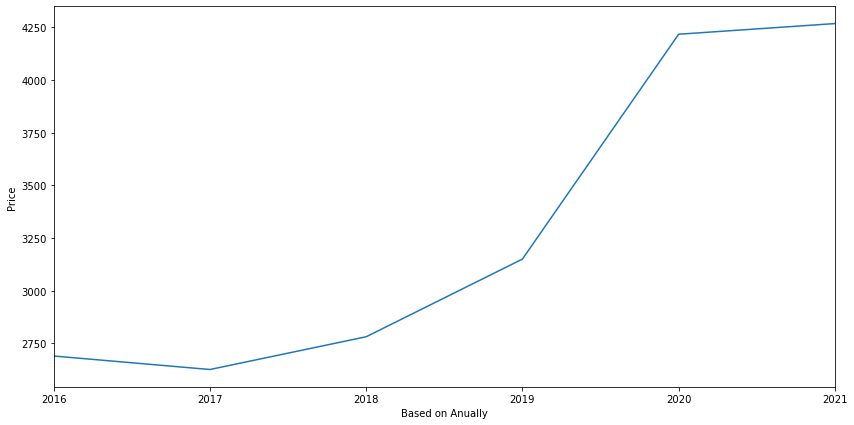

In [158]:
#weekly
plt.figure(figsize=(14,7))
gold_price['price'].resample(rule='W').mean().plot()
plt.ylabel('price')
plt.xlabel('Based on weekly')

#month wise
plt.figure(figsize=(14,7))
gold_price["price"].resample(rule="MS").mean().plot()
plt.ylabel("Price")
plt.xlabel('based on monthly')

#Ouaterly wise
plt.figure(figsize=(14,7))
gold_price["price"].resample(rule="QS").mean().plot()
plt.ylabel("Price")
plt.xlabel('based on quaterly')

#anually wise
plt.figure(figsize=(14,7))
gold_price["price"].resample(rule="A").mean().plot()
plt.ylabel("Price")
plt.xlabel('Based on Anually')

<AxesSubplot:xlabel='date', ylabel='price'>

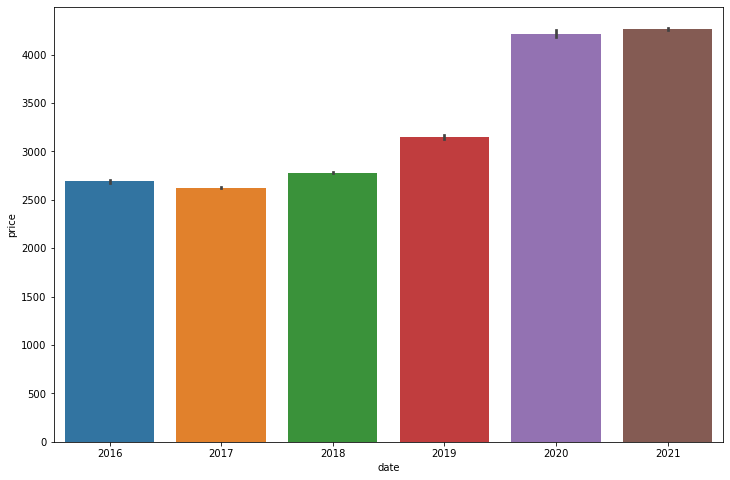

In [159]:
#Annually
sns.barplot(data=gold_price , x=gold_price.index.year, y='price')

# Time Series Decomposition plots

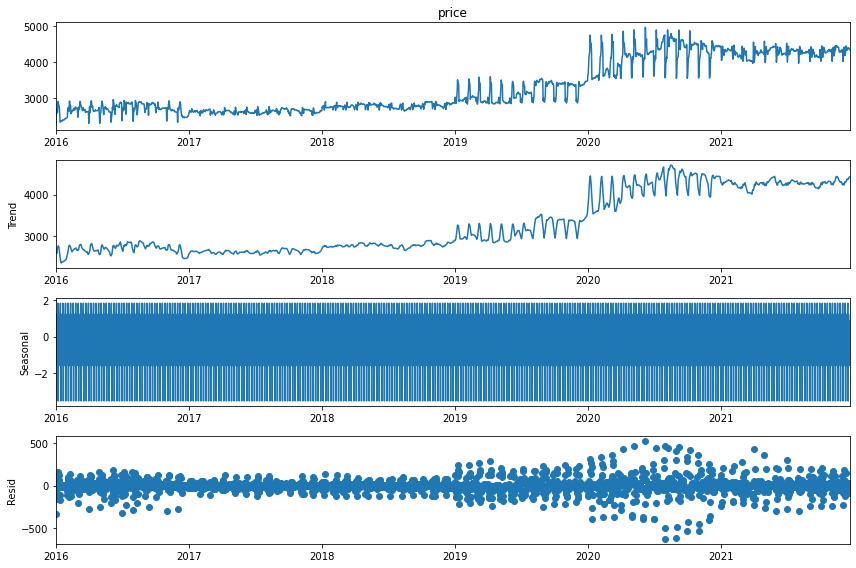

In [160]:
decompose_ts_add = seasonal_decompose(gold_price['price'],extrapolate_trend='freq')
decompose_ts_add.plot()
plt.rcParams['figure.figsize'] = (12, 8)
plt.show()

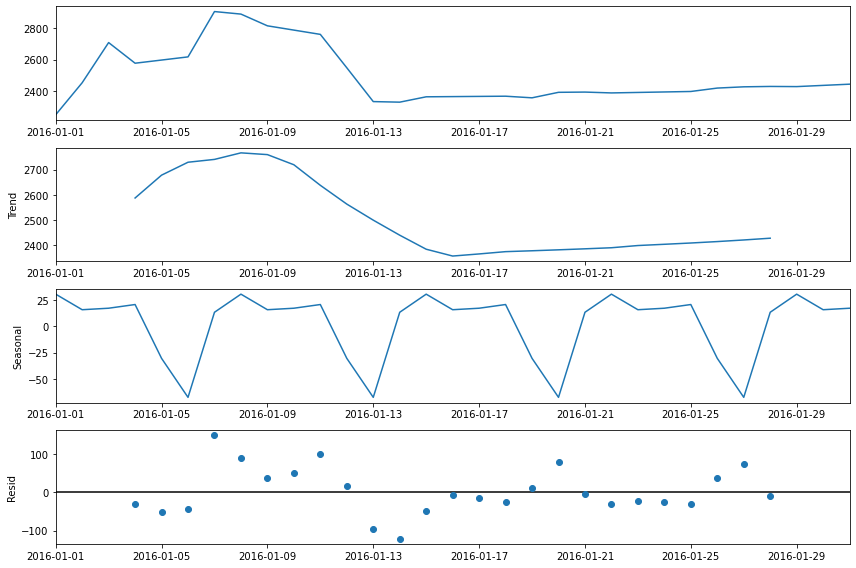

In [161]:
#for day ways 
#by considering only the one month data 

decompose_ts_add=seasonal_decompose(gold_price[:31])
decompose_ts_add.plot()
#plt.rcParams['figure.figsize'] = (12, 8)
plt.show()

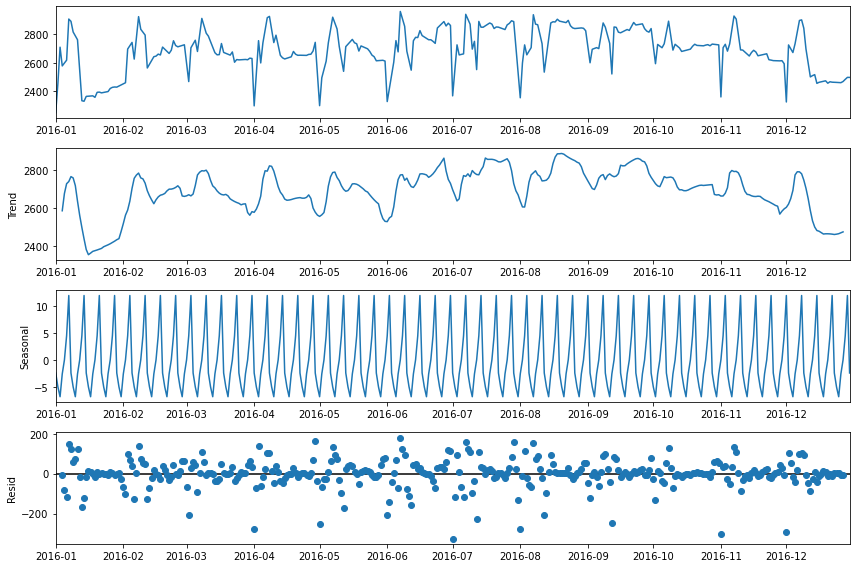

In [162]:
#for day wise 
#considering the one year data
decompose_ts_add=seasonal_decompose(gold_price[:365])
decompose_ts_add.plot()
plt.show()
plt.rcParams['figure.figsize'] = (12, 8)

from above decomposition plots we can say that 
our data is not following trend but there is a seasionality

# Distribution Plot

<AxesSubplot:ylabel='Density'>

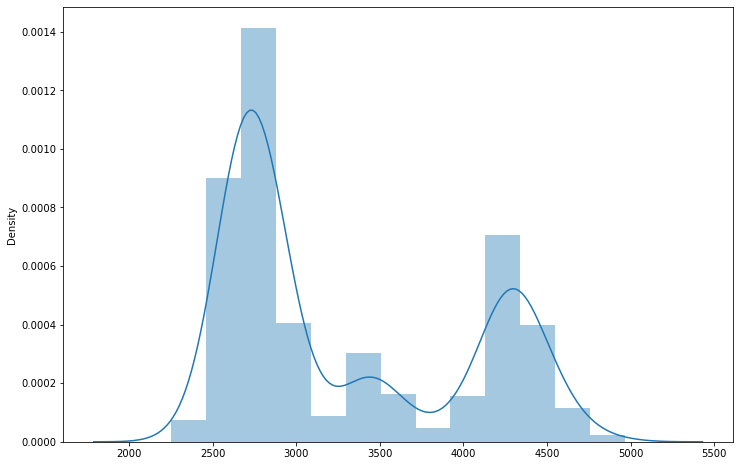

In [163]:
sns.distplot(gold_price)

# Splitting the data into train and test

In [164]:
#splitting the data
Train = gold_price.head(2039)
Test = gold_price.tail(143)

In [165]:
Train

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-07-27,4308.60
2021-07-28,4317.70
2021-07-29,4357.90


In [166]:
Test

,price
date,
2021-08-01,4347.3
2021-08-02,4293.9
2021-08-03,3967.3
2021-08-04,4203.8
2021-08-05,4306.9
...,...
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5


# Moving average

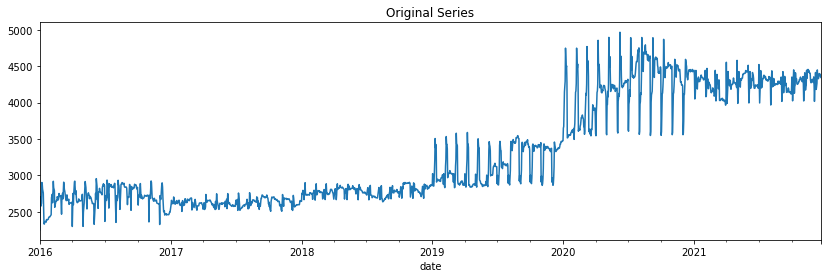

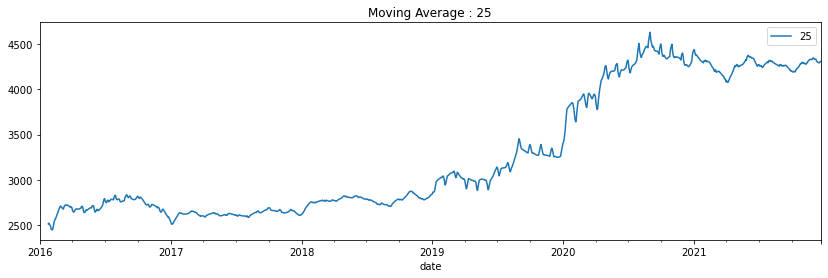

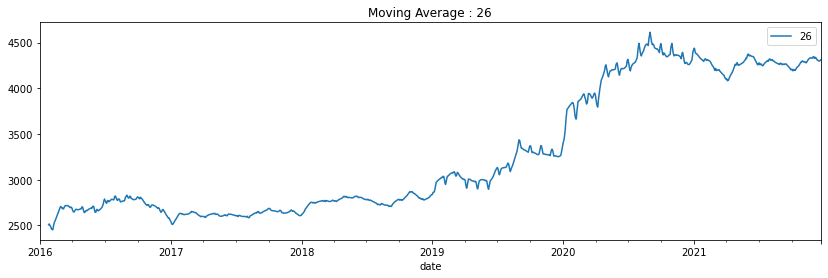

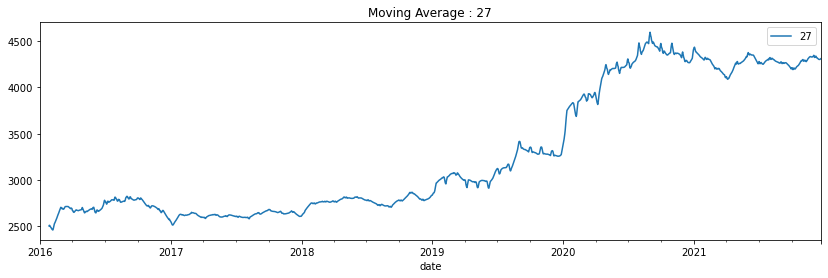

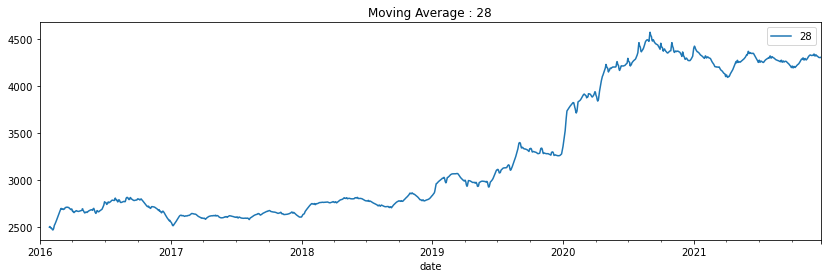

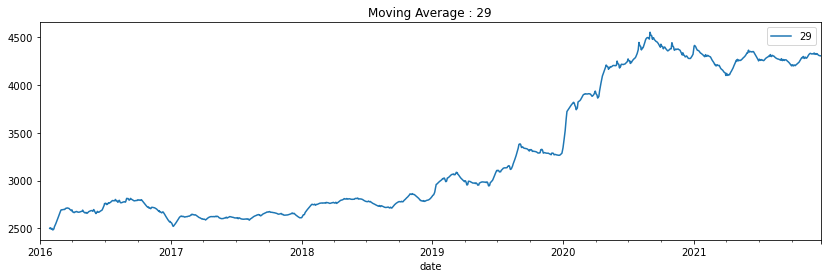

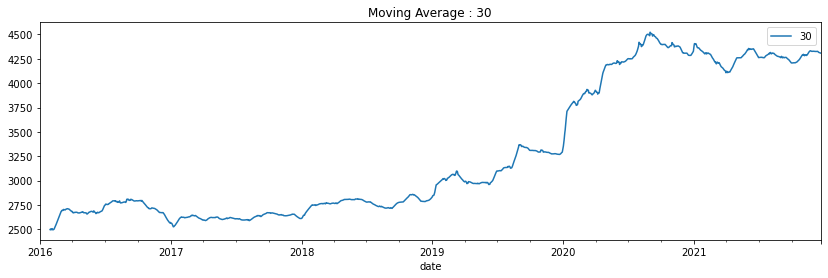

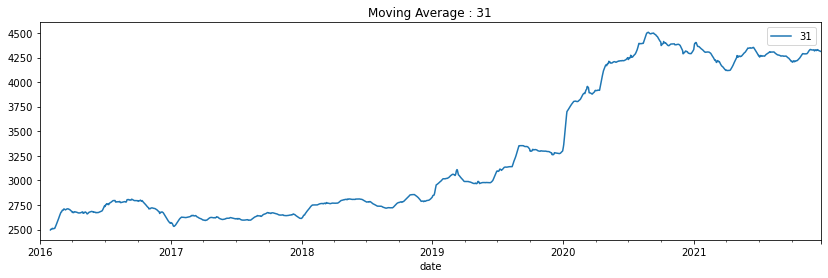

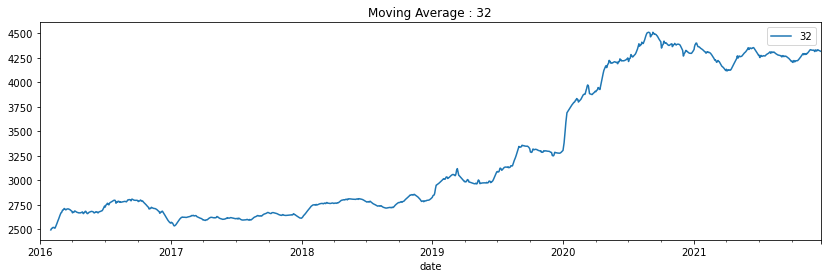

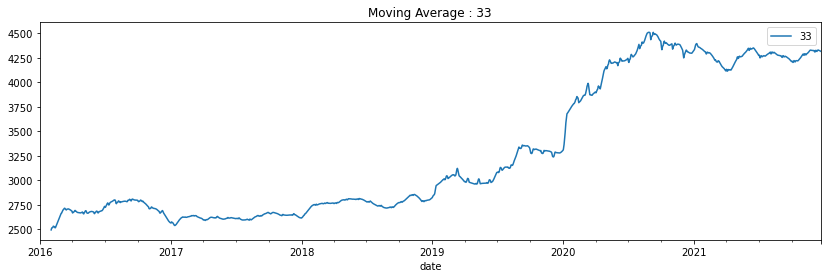

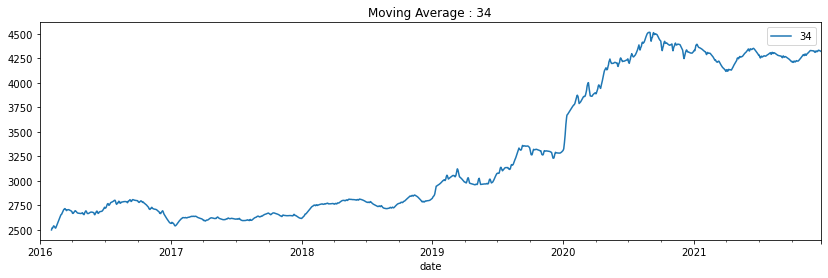

In [267]:
plt.figure(figsize=(14,4))
gold_price.price.plot(label='org')
plt.title('Original Series')

for i in range (25,35):
    plt.figure(figsize=(14,4))
     
    gold_price['price'].rolling(i).mean().plot(label=str(i))
    plt.title('Moving Average : '+str(i))
    plt.legend(loc='best')
    plt.show()

In [170]:
import warnings
warnings.filterwarnings('ignore')

# Evaluation Metric MAPE

In [171]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Model Preparation for forecasting

# Data Driven forecasting 

# Model Based or Driven Forcasting technique

# Using the data driven models

# Simple Exponential Method 

In [172]:
#checking for the best smoothing 

In [173]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.price) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 1.850892654464531
smoothing_level  0.1473684210526316 --> MAPE Error 1.8888979702427473
smoothing_level  0.19473684210526315 --> MAPE Error 1.9073119317692817
smoothing_level  0.24210526315789474 --> MAPE Error 1.9212959472810531
smoothing_level  0.2894736842105263 --> MAPE Error 1.934643133083575
smoothing_level  0.33684210526315794 --> MAPE Error 1.9482561528558888
smoothing_level  0.38421052631578945 --> MAPE Error 1.960399953399421
smoothing_level  0.43157894736842106 --> MAPE Error 1.9705854335566868
smoothing_level  0.4789473684210527 --> MAPE Error 1.9783692683599052
smoothing_level  0.5263157894736842 --> MAPE Error 1.9836004605787754
smoothing_level  0.5736842105263158 --> MAPE Error 1.9863915375652346
smoothing_level  0.6210526315789474 --> MAPE Error 1.9871145574264173
smoothing_level  0.6684210526315789 --> MAPE Error 1.9861919140023825
smoothing_level  0.7157894736842105 --> MAPE Error 1.9840604268438617
smoothing_level  0.76315789473684

In [174]:
ses_model = SimpleExpSmoothing(Train['price']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=Test.index[0] , end=Test.index[-1])
simple_exp_model=MAPE(pred_ses , Test.price)
simple_exp_model

1.9090012489287536

# Double or holt exponential method

In [175]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["price"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        score=MAPE(pred_hw,Test.price)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))
        
        

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 7.260863421161088
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 2.1238531067745194
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 5.251795020674918
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 9.096862190478715
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 11.98347722952683
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 8.290408090258966
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 1.7073531547745835
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 7.36405499891953
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 8.24657164930166
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 7.371761104989355
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 3.2551739761995955
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 2.523861418196147
smoothing_level  0.19  smoothing_slope 0.28 

smoothing_level  0.9099999999999999  smoothing_slope 0.9099999999999999 --> MAPE Error 11.009123632164304


In [176]:
hw_model = Holt(Train['price']).fit(smoothing_level=0.5,smoothing_slope =0.5)
pred_hw = hw_model.predict(start=Test.index[0],end=Test.index[-1])
double_exp_model=MAPE(pred_hw,Test.price)
double_exp_model

10.74708884018506

# triple  or Holt Winner Exponential Method

In [177]:
#seasonal =additive ,trend=additive

In [178]:
hwe_model_add_add = ExponentialSmoothing(Train['price'],seasonal='add',trend='add',seasonal_periods=31).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
triple_exp_add_add=MAPE(pred_hwe_add_add,Test.price)
triple_exp_add_add

4.129450644639614

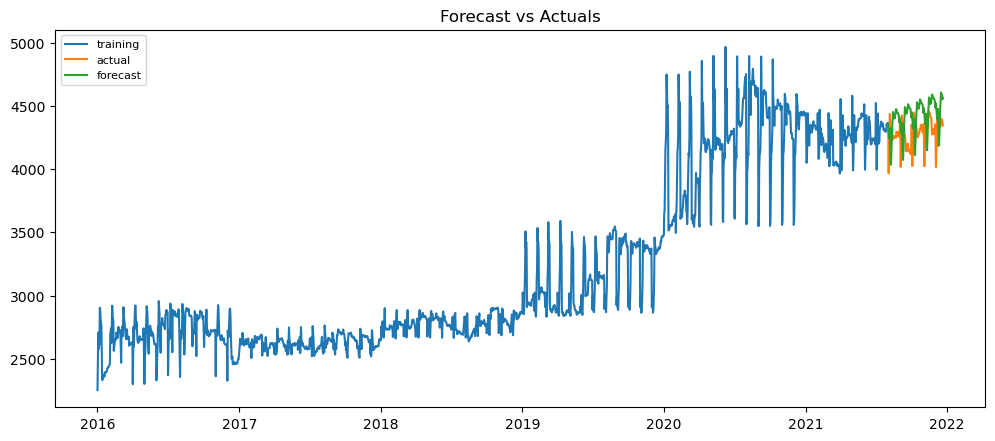

In [222]:
fc=hwe_model_add_add.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

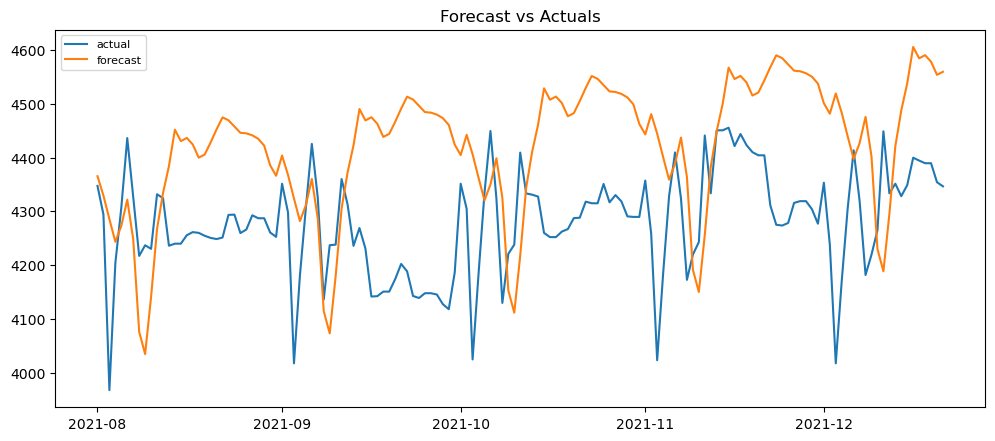

In [223]:
fc=hwe_model_add_add.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [180]:
#seasonal=multiplicative , trend=additive

In [181]:
hwe_model_mul_add = ExponentialSmoothing(Train['price'],seasonal='mul',trend='add',seasonal_periods=31).fit()
pred_hwe_mul_add= hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
triple_exp_mul_add=MAPE(pred_hwe_mul_add,Test.price)
triple_exp_mul_add

4.128669807273897

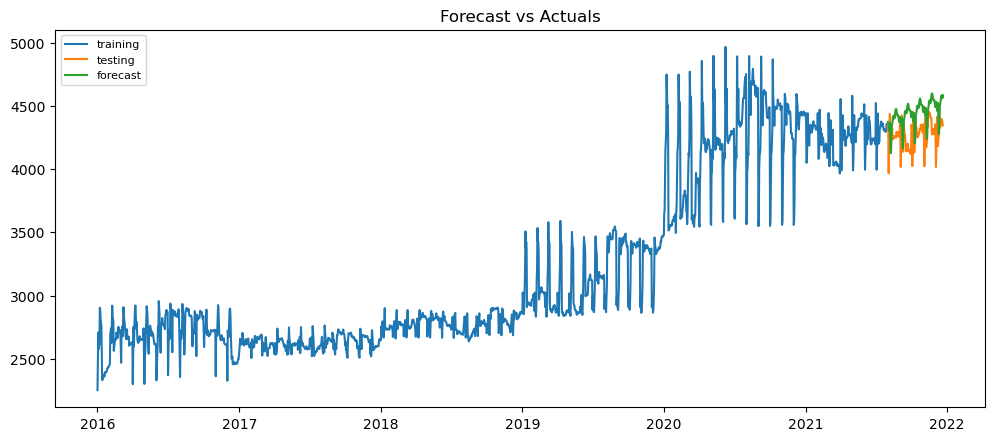

In [182]:
fc=hwe_model_mul_add.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='testing')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

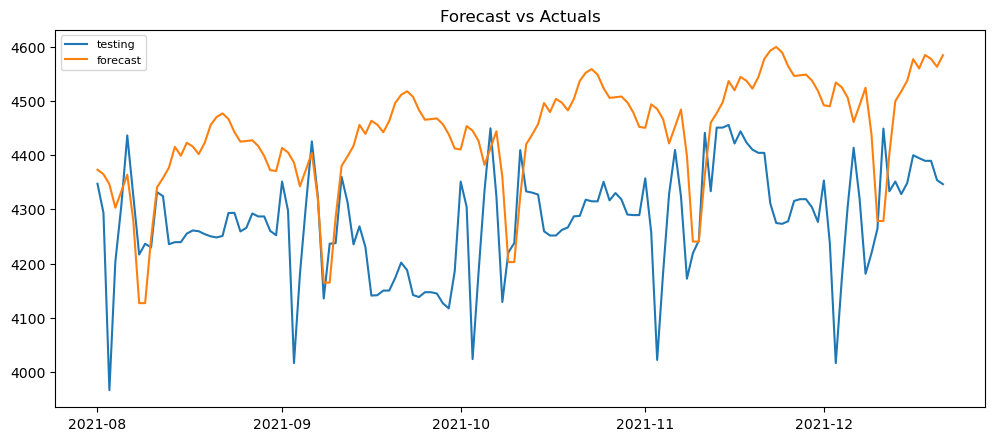

In [224]:
fc=hwe_model_mul_add.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(Train, label='training')
plt.plot(Test, label='testing')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [183]:
#seasonal = additive , trend = multiplicative

In [184]:
hwe_model_add_mul = ExponentialSmoothing(Train['price'],seasonal='add',trend='mul',seasonal_periods=31).fit()
pred_hwe_add_mul = hwe_model_add_mul.predict(start=Test.index[0],end=Test.index[-1])
triple_exp_add_mul=MAPE(pred_hwe_add_mul,Test.price)
triple_exp_add_mul

5.740689617988603

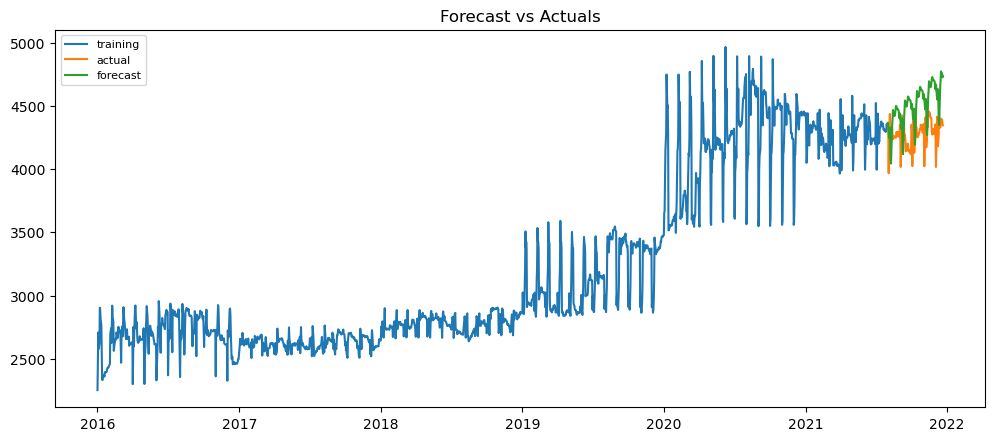

In [185]:
fc=hwe_model_add_mul.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

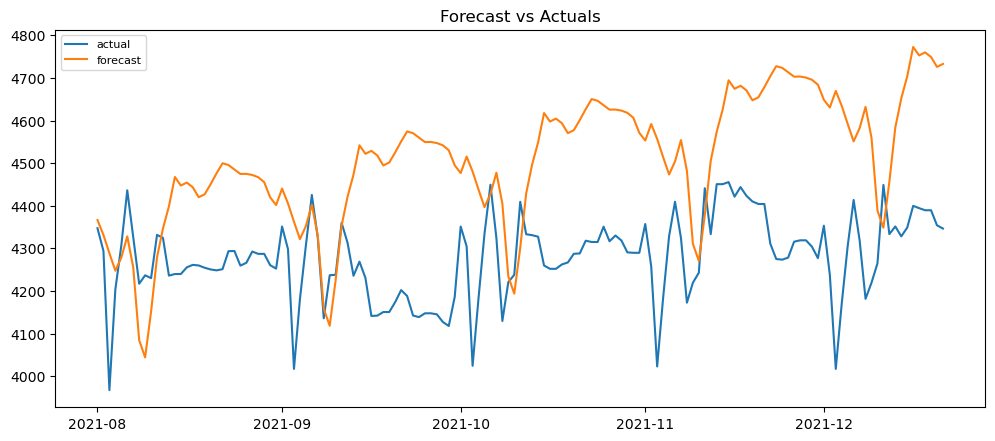

In [225]:
fc=hwe_model_add_mul.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [186]:
#seasonal = multiplicative , trend = multiplicative

In [187]:
hwe_model_mul_mul = ExponentialSmoothing(Train['price'],seasonal='mul',trend='mul',seasonal_periods=31).fit()
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start=Test.index[0],end=Test.index[-1])
triple_exp_mul_mul=MAPE(pred_hwe_mul_mul,Test.price)
triple_exp_mul_mul

7.841788129925383

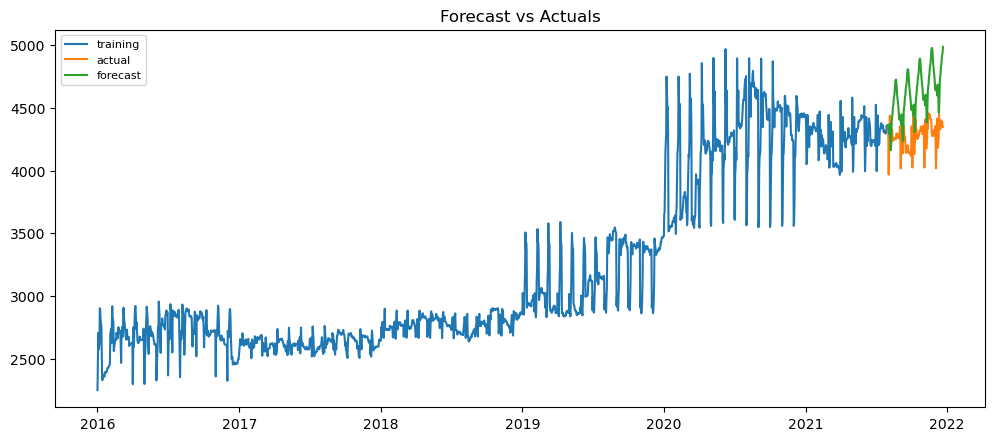

In [188]:
fc=hwe_model_mul_mul.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

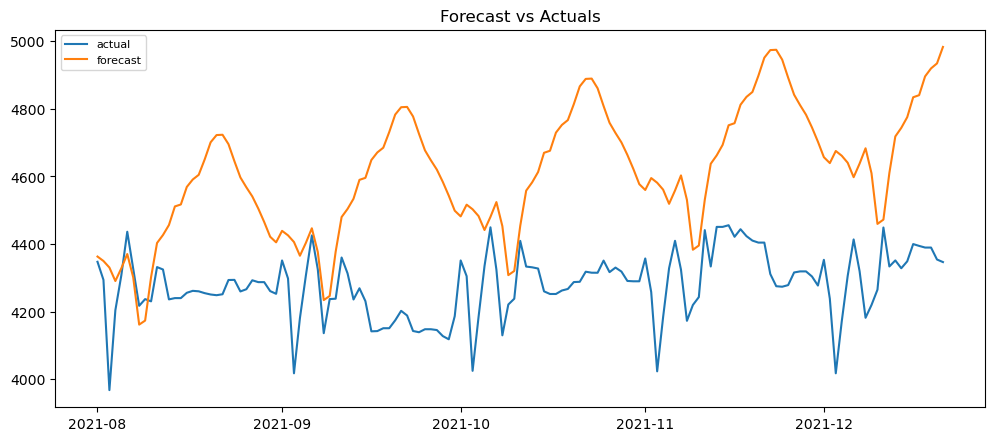

In [226]:
fc=hwe_model_mul_mul.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Model driven forcasting

# ARIMA and SARIMA


In [189]:
gold_price

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


# Visualize the data

<AxesSubplot:xlabel='date'>

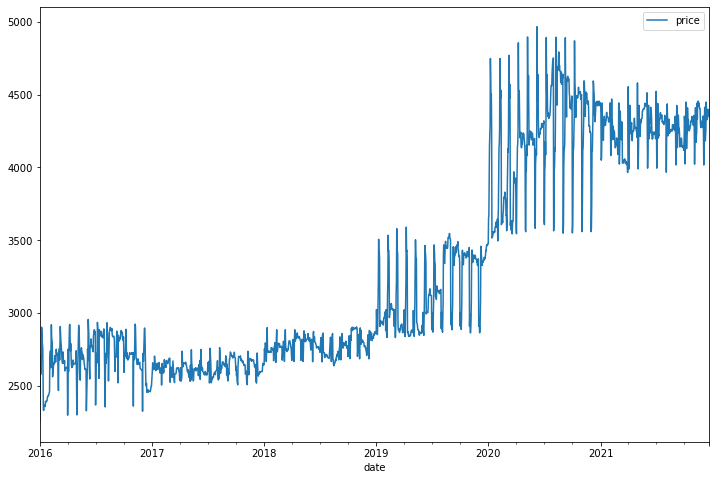

In [190]:
gold_price.plot()

# Checking for the stationarity of the data

# checking the stationarity by using the ADFuller technique

In [191]:
#gold_price = adfuller(gold_price['price'])

In [192]:
#ADF Test nul hypothesis -non stationarity if p-value <5% reject null hypothesis
adf = adfuller(gold_price['price'])[1]
print(f'p value:{adf.round(4)}',',series is stationary' if adf<0.05 else ',series is non stationary')

p value:0.9241 ,series is non stationary


# Differencing

p value:0.0 ,series is stationary


<AxesSubplot:xlabel='date'>

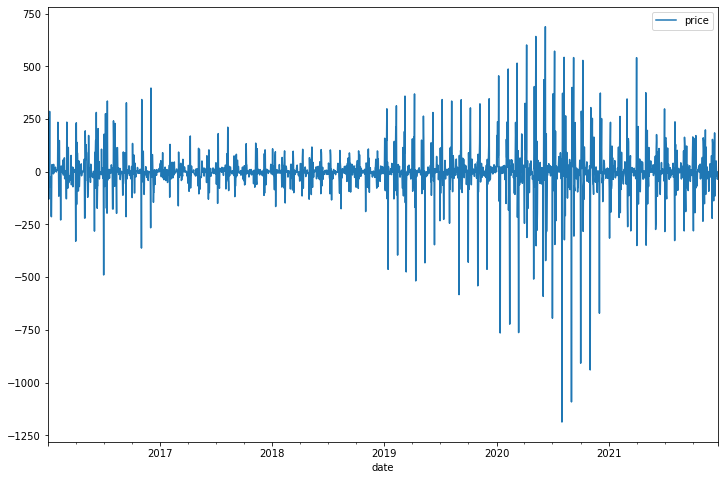

In [195]:
stationary_gold_price = gold_price.diff(1).dropna()
adf2 = adfuller(stationary_gold_price)[1]
print(f'p value:{adf2}',',series is stationary' if adf2<0.05 else ",series is non stationary")
stationary_gold_price.plot()

In [196]:
#sns.distplot(stationary_gold_price)

# Checking the Distribution of the data after differencing

<AxesSubplot:ylabel='Density'>

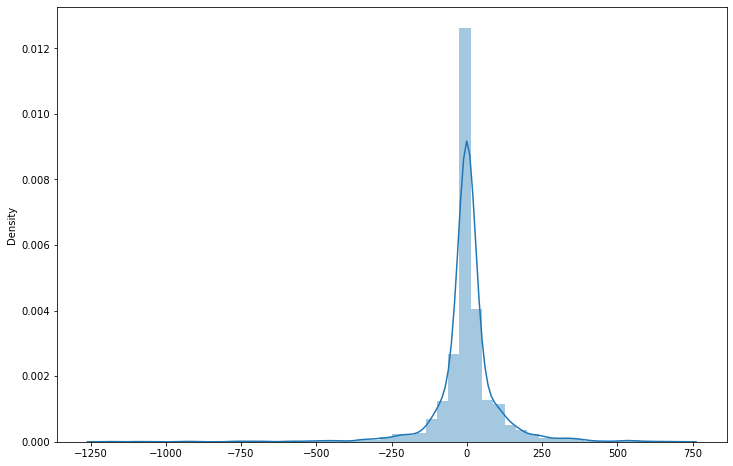

In [197]:
sns.distplot(stationary_gold_price)

from the above distplot we got to know that our data is normally distributed

# checking the stationarity by seeing the mean , standard deviation 

# Differencing

 #differencing value d=1
plt.figure(figsize=(16,7))
fig = plt.figure(1)
gold_price_diff = gold_price.price - gold_price.price.shift(periods=1)
plt.plot(gold_price_diff)

#Determing rolling statistics 
rollingmean = gold_price_diff.rolling(7).mean()
rollingstd = gold_price_diff.rolling(7).std()

#plot rolling statistics :
orig = plt.plot(gold_price_diff,color='blue' , label='Original')
mean = plt.plot(rollingmean , color='red' , label='Rolling mean')
std = plt.plot(rollingstd , color='black',label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std after diff')
plt.show(block=False)

# Ploting the Auto-correlation plot

# ACF plots and PACF plots

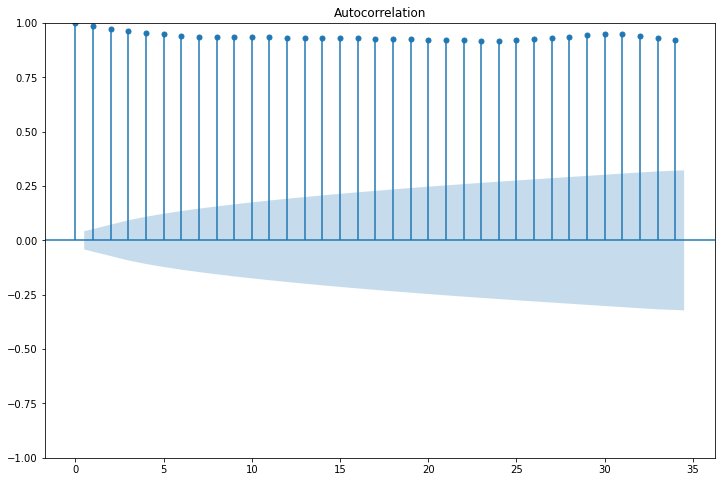

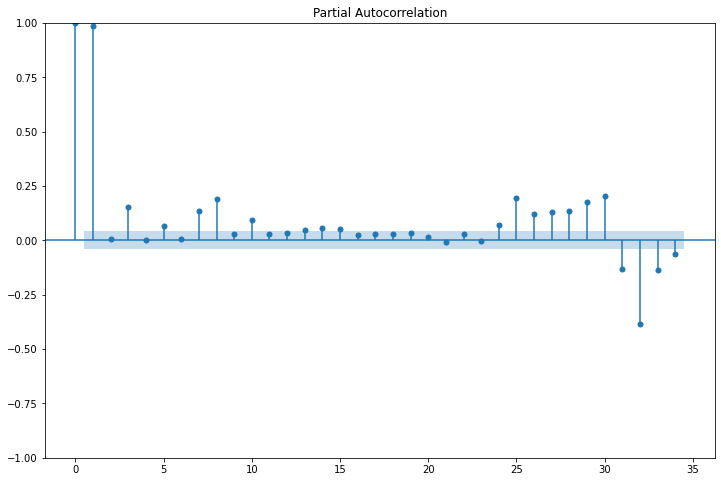

In [198]:
tsa_plots.plot_acf(gold_price.price)
tsa_plots.plot_pacf(gold_price.price)
plt.show()

# ACF and PACF plots for data after considering the differencing  

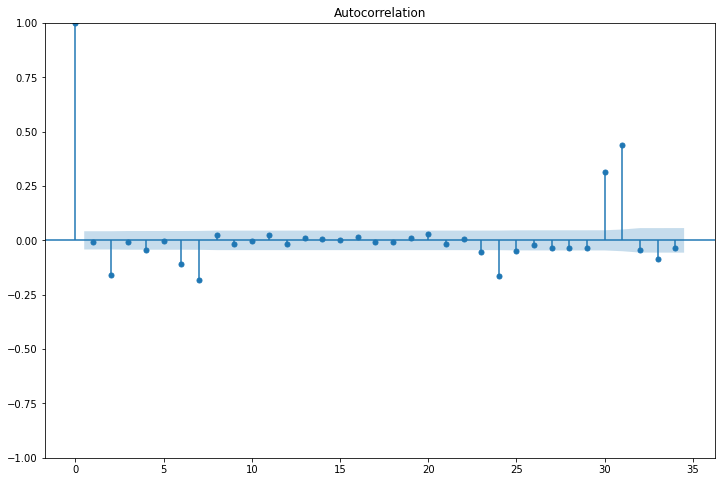

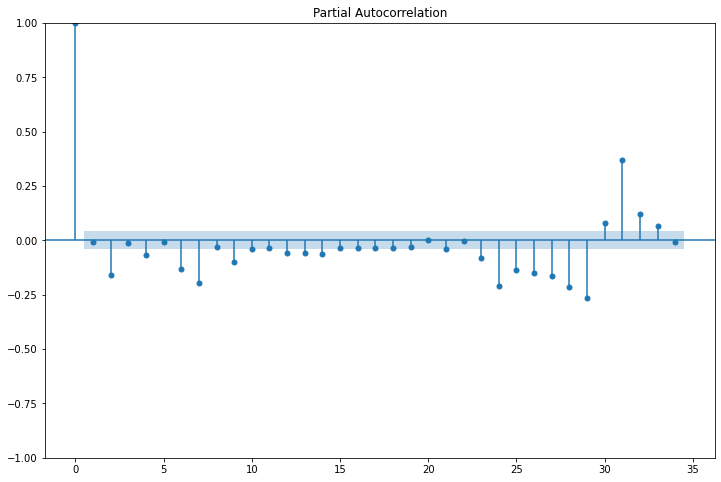

In [199]:
tsa_plots.plot_acf(stationary_gold_price.price)
tsa_plots.plot_pacf(stationary_gold_price.price)
plt.show()

# Creating the ARMA Model

# creating the ARIMA model

In [200]:
#for non seasonal data
#p=1,d=1,q=1

In [241]:
from statsmodels.tsa.arima.model import ARIMA

arima_model_train_1_1 = ARIMA(Train.price , order=(1,1,1)).fit()

pred_arima = arima_model_train.predict(start=Test.index[0],end=Test.index[-1])
ARIMA_MODEL_TRAIN_1_1=MAPE(pred_arima , Test.price)
ARIMA_MODEL_TRAIN_1_1

1.7879069160408234

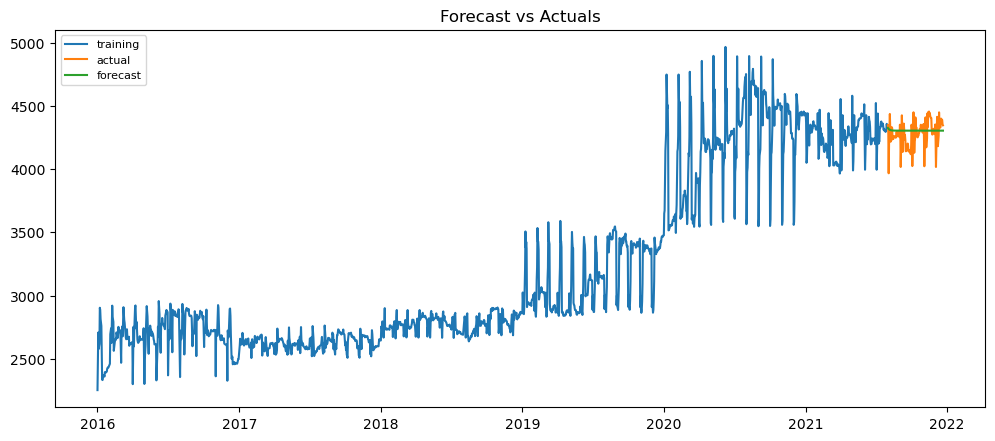

In [228]:
fc=arima_model_train_1_1.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [268]:
#for non seasonal data
#p=7,d=1,q=7

In [269]:
from statsmodels.tsa.arima.model import ARIMA

arima_model_train_7_7 = ARIMA(Train.price , order=(7,1,7)).fit()

pred_arima = arima_model_train.predict(start=Test.index[0],end=Test.index[-1])
ARIMA_MODEL_TRAIN_7_7=MAPE(pred_arima , Test.price)
ARIMA_MODEL_TRAIN_7_7

1.7879069160408234

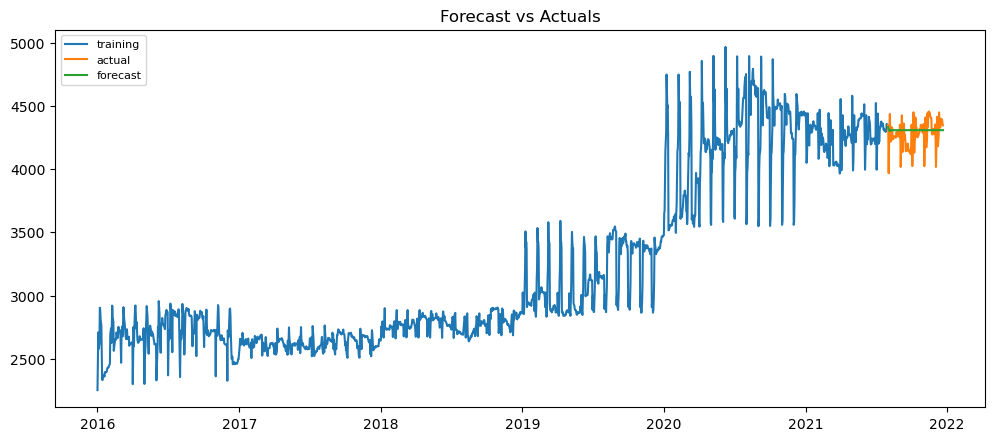

In [230]:
fc=arima_model_train_7_7.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [206]:
#for non seasonal data
#p=31,d=1,q=31

In [244]:
from statsmodels.tsa.arima.model import ARIMA

arima_model_train_31_31 = ARIMA(Train.price , order=(31,1,31)).fit()

pred_arima = arima_model_train.predict(start=Test.index[0],end=Test.index[-1])
ARIMA_MODEL_TRAIN_31_31=MAPE(pred_arima , Test.price)
ARIMA_MODEL_TRAIN_31_31

1.7879069160408234

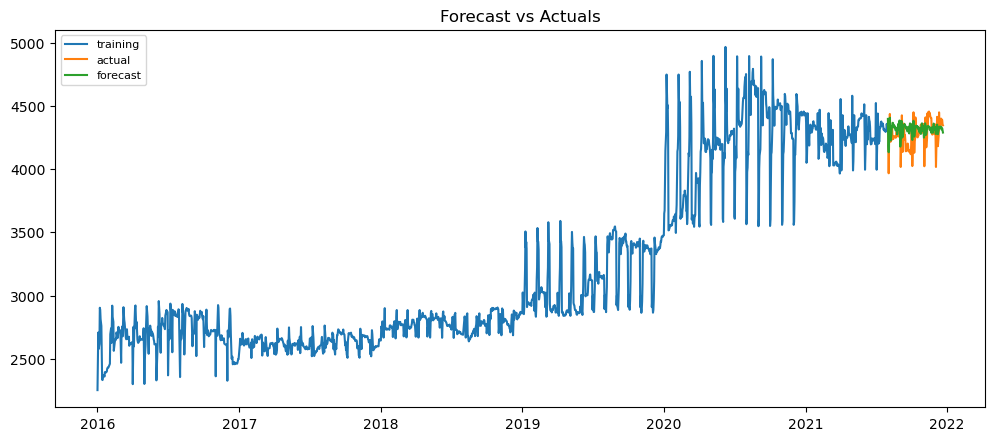

In [245]:
fc=arima_model_train_31_31.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

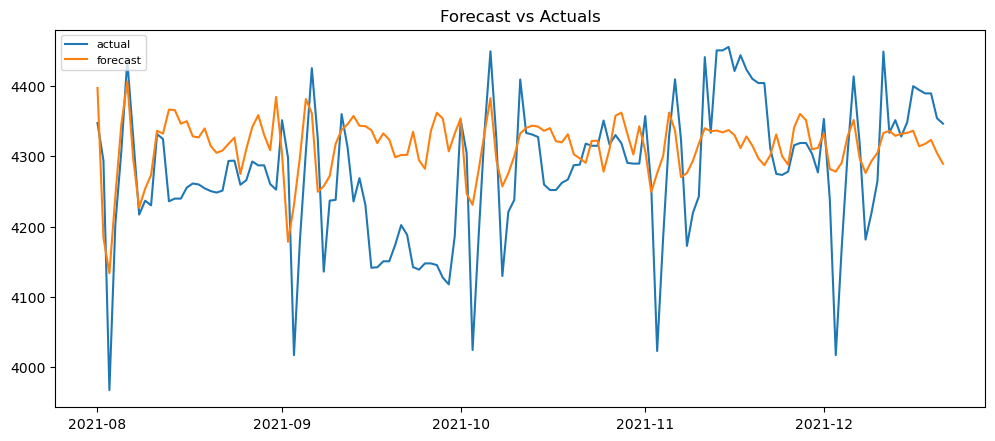

In [246]:
fc=arima_model_train_31_31.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [247]:
from statsmodels.tsa.arima.model import ARIMA

arima_model_train_4_1 = ARIMA(Train.price , order=(4,1,1)).fit()

pred_arima = arima_model_train.predict(start=Test.index[0],end=Test.index[-1])
ARIMA_MODEL_TRAIN_4_1=MAPE(pred_arima , Test.price)
ARIMA_MODEL_TRAIN_4_1

1.7879069160408234

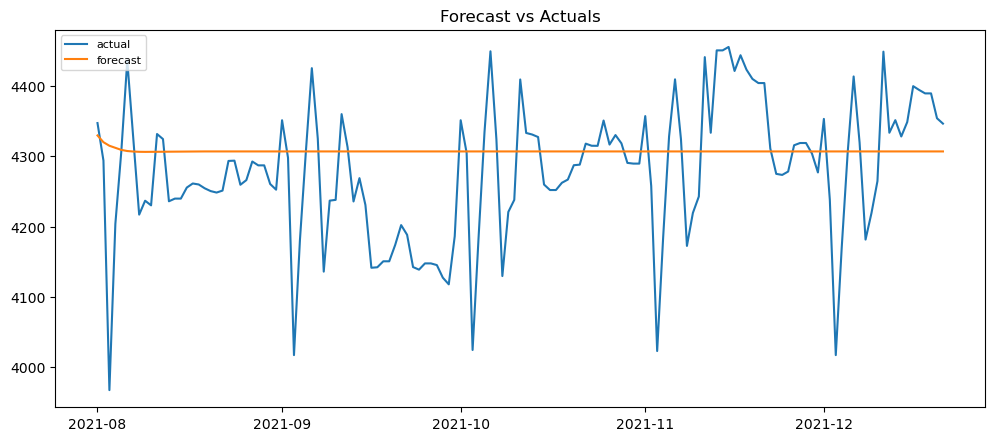

In [248]:
fc=arima_model_train_4_1.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [249]:
from statsmodels.tsa.arima.model import ARIMA

arima_model_train_1_4_1 = ARIMA(Train.price , order=(1,4,1)).fit()

pred_arima = arima_model_train.predict(start=Test.index[0],end=Test.index[-1])
ARIMA_MODEL_TRAIN_1_4_1=MAPE(pred_arima , Test.price)
ARIMA_MODEL_TRAIN_1_4_1

1.7879069160408234

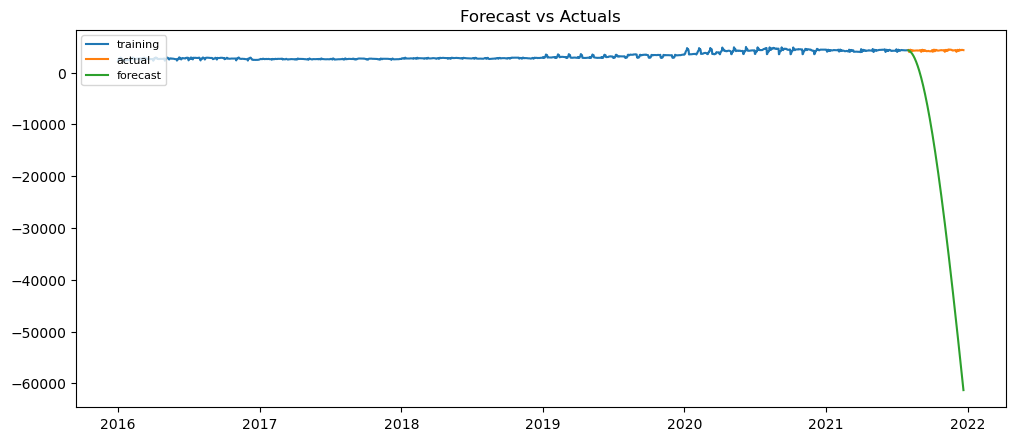

In [250]:
fc=arima_model_train_1_4_1.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# creating the SARIMA model

In [252]:
sarima_model_train = sm.tsa.statespace.SARIMAX(Train['price'] , order=(1,1,1),seasonal_order=(1,1,1,7)).fit()
pred_sarima = sarima_model_train.predict(start=Test.index[0] , end=Test.index[-1])
SARIMA_MODEL=MAPE(pred_sarima , Test.price)
SARIMA_MODEL

2.985679981754095

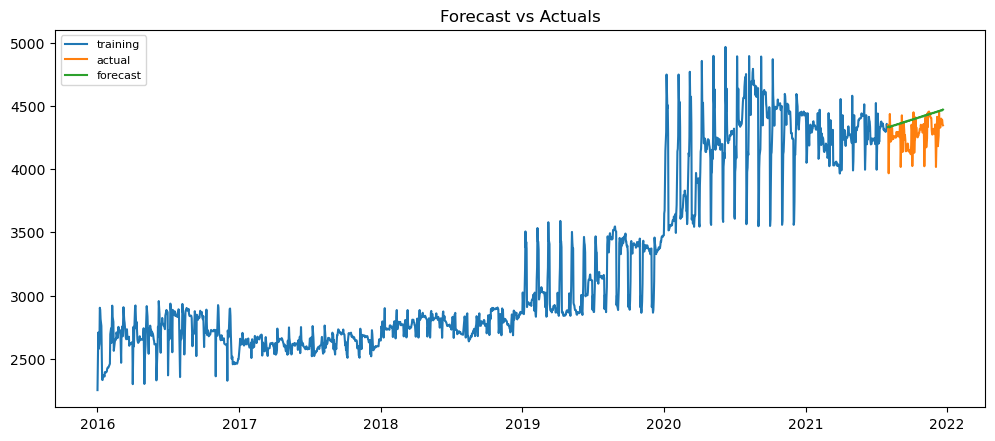

In [254]:
fc=sarima_model_train.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

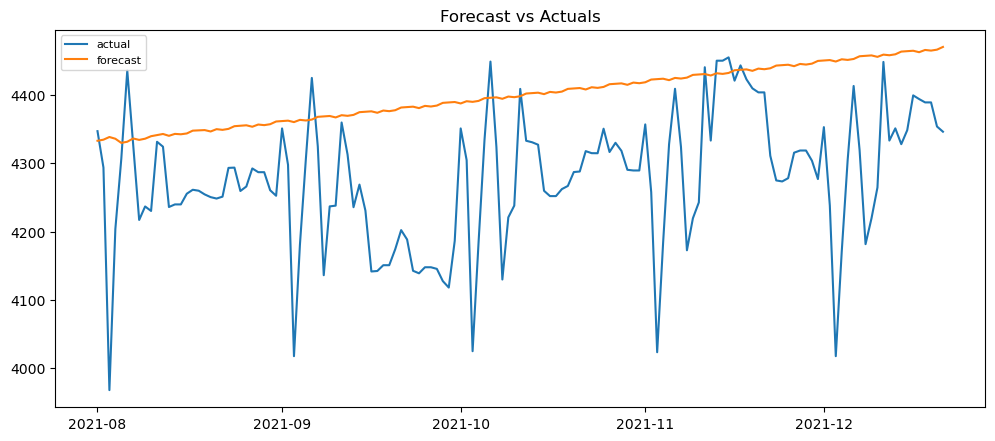

In [253]:
fc=sarima_model_train.forecast(143)
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Creating the data frame for error percentage

In [255]:
Error_percentage = {"MODEL":pd.Series(["Simple_exp_smoothing","Holt_exponential_model","Holt_winter_exp_smoothing_add_add","Holt_wilter_exp_smoothing_mul_add","Holt_wilter_exp_smoothing_add_mul",'Holt_wilter_exp_smoothing_mul_mul',"arima_model_train_1_1","arima_model_train_7_7","arima_model_train_31_31","arima_model_train_4_1","arima_model_train_1_4_1","SARIMA_Model"]),
        "MAPE_Values":pd.Series([simple_exp_model,double_exp_model,triple_exp_add_add,triple_exp_mul_add,triple_exp_add_mul,triple_exp_mul_mul,ARIMA_MODEL_TRAIN_1_1,ARIMA_MODEL_TRAIN_7_7,ARIMA_MODEL_TRAIN_31_31,ARIMA_MODEL_TRAIN_4_1,ARIMA_MODEL_TRAIN_1_4_1,SARIMA_MODEL])}
table_MAPE=pd.DataFrame(Error_percentage)
table_MAPE
#table_MAPE.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
0,Simple_exp_smoothing,1.909001
1,Holt_exponential_model,10.747089
2,Holt_winter_exp_smoothing_add_add,4.129451
3,Holt_wilter_exp_smoothing_mul_add,4.128670
4,Holt_wilter_exp_smoothing_add_mul,5.740690
5,Holt_wilter_exp_smoothing_mul_mul,7.841788
6,arima_model_train_1_1,1.787907
7,arima_model_train_7_7,1.787907
8,arima_model_train_31_31,1.787907
9,arima_model_train_4_1,1.787907


In [256]:
#predicting the values test by using the ARIMA_MODEL_TRAIN 
#predicting the values for the next 30 days for test data
arima_model_train_31_31.forecast(143)

2021-08-01    4397.104314
2021-08-02    4184.157836
2021-08-03    4133.623001
2021-08-04    4243.115226
2021-08-05    4344.913562
                 ...     
2021-12-17    4314.240989
2021-12-18    4317.687410
2021-12-19    4323.365554
2021-12-20    4304.587864
2021-12-21    4289.401869
Freq: D, Name: predicted_mean, Length: 143, dtype: float64

In [265]:
gold_price

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [257]:
#fitting the final model using the ARIMA model with p=31 , d=1 , q=31
FINAL_ARIMA_MODEL= ARIMA(gold_price['price'], order=(31,1,31)).fit()

In [258]:
FINAL_ARIMA_MODEL.forecast(30) 

2021-12-22    4326.783271
2021-12-23    4279.412115
2021-12-24    4281.548090
2021-12-25    4280.888851
2021-12-26    4274.616065
2021-12-27    4323.533805
2021-12-28    4316.096356
2021-12-29    4315.799112
2021-12-30    4293.336909
2021-12-31    4300.530645
2022-01-01    4324.886584
2022-01-02    4207.306948
2022-01-03    4122.066118
2022-01-04    4246.553842
2022-01-05    4335.248011
2022-01-06    4376.303858
2022-01-07    4276.816983
2022-01-08    4200.032419
2022-01-09    4248.773305
2022-01-10    4326.838601
2022-01-11    4393.336666
2022-01-12    4324.514541
2022-01-13    4334.445718
2022-01-14    4332.234481
2022-01-15    4342.081853
2022-01-16    4371.949422
2022-01-17    4375.338771
2022-01-18    4354.861810
2022-01-19    4361.080810
2022-01-20    4333.291948
Freq: D, Name: predicted_mean, dtype: float64

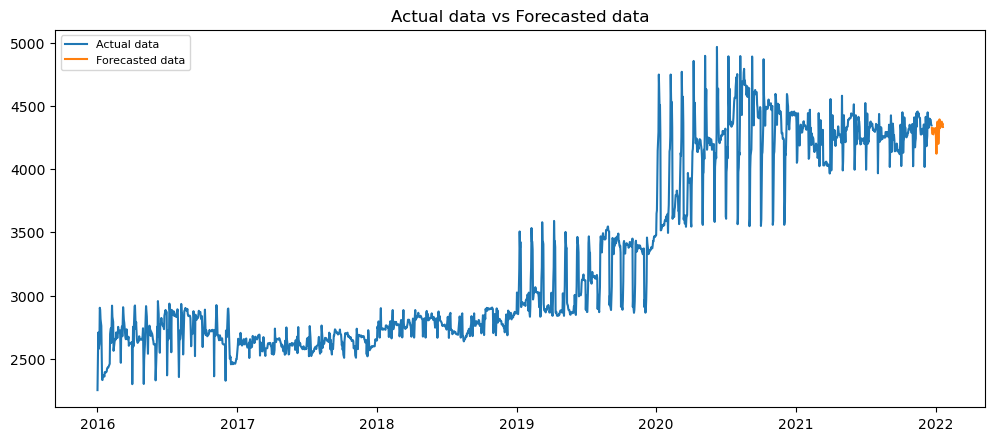

In [259]:
Final_arima_model=FINAL_ARIMA_MODEL.forecast(30)
#make pandas as series
final_series = pd.Series(Final_arima_model)
#ploting
plt.figure(figsize=(12,5) , dpi=100)
plt.plot(gold_price , label='Actual data')
plt.plot(final_series,label='Forecasted data')
plt.title('Actual data vs Forecasted data')
plt.legend(loc='upper left' , fontsize=8)
plt.show()
#gold_price[['price', 'forecast']].plot(figsize=(12, 8))


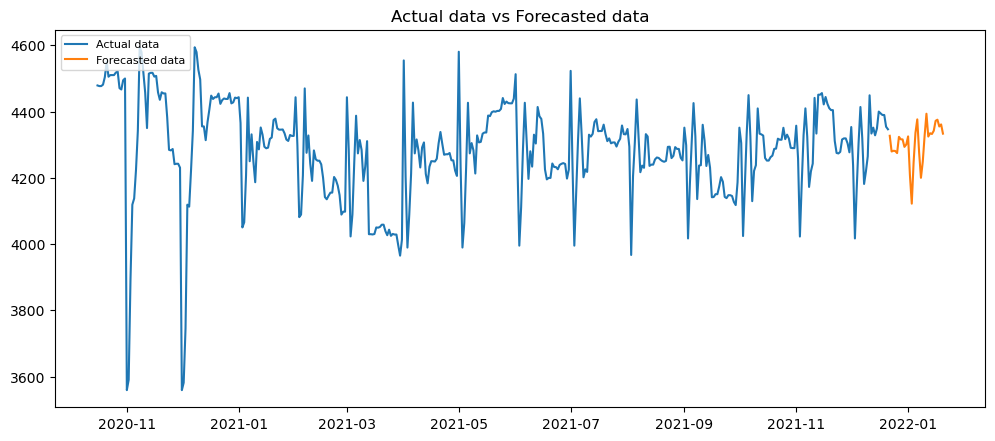

In [266]:
Final_arima_model=FINAL_ARIMA_MODEL.forecast(30)
#make pandas as series
final_series = pd.Series(Final_arima_model)
#ploting
plt.figure(figsize=(12,5) , dpi=100)
plt.plot(gold_price[1750:] , label='Actual data')
plt.plot(final_series,label='Forecasted data')
plt.title('Actual data vs Forecasted data')
plt.legend(loc='upper left' , fontsize=8)
plt.show()
#gold_price[['price', 'forecast']].plot(figsize=(12, 8))


# Grid Search For the Hyper Parameters

In [120]:
# Import libraries

from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [122]:
# separate out a validation dataset
split_point = len(stationary_gold_price) - 143
dataset, validation = stationary_gold_price[0:split_point], stationary_gold_price[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=False)

Dataset 2038, Validation 143


In [123]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p=2,d=4,q=3) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    mape = MAPE(test, predictions)
    return mape

In [124]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mape = evaluate_arima_model(train, order)
                    if mape < best_score:
                        best_score, best_cfg = mape, order
                    print('ARIMA%s MAPE=%.3f' % (order,mape))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))

In [125]:
import statsmodels.api as sm

In [126]:
from statsmodels.tsa.arima.model import ARIMA

In [127]:
# load dataset
train = pd.read_csv('dataset.csv', index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(1, 5)
d_values = range(1, 5)
q_values = range(1, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(1, 1, 1) MAPE=11864.611
ARIMA(1, 1, 2) MAPE=6878.170
ARIMA(1, 1, 3) MAPE=8140.569
ARIMA(1, 1, 4) MAPE=6781.611
ARIMA(1, 2, 1) MAPE=1181.256
ARIMA(1, 2, 2) MAPE=3729.934
ARIMA(1, 2, 3) MAPE=4418.834
ARIMA(1, 2, 4) MAPE=6465.901
ARIMA(1, 3, 1) MAPE=309.680
ARIMA(1, 3, 2) MAPE=1119.756
ARIMA(1, 3, 3) MAPE=7501.458
ARIMA(1, 3, 4) MAPE=4580.568
ARIMA(1, 4, 1) MAPE=165.539
ARIMA(1, 4, 2) MAPE=299.673
LU decomposition error.
LU decomposition error.
ARIMA(2, 1, 1) MAPE=5231.903
ARIMA(2, 1, 2) MAPE=4607.777
ARIMA(2, 1, 3) MAPE=inf
ARIMA(2, 1, 4) MAPE=1136.747
ARIMA(2, 2, 1) MAPE=1132.492
LU decomposition error.
ARIMA(2, 2, 3) MAPE=5906.590
ARIMA(2, 2, 4) MAPE=29381.533
ARIMA(2, 3, 1) MAPE=381.160
LU decomposition error.
LU decomposition error.
LU decomposition error.
ARIMA(2, 4, 1) MAPE=343.573
LU decomposition error.
LU decomposition error.
LU decomposition error.
ARIMA(3, 1, 1) MAPE=3614.728
ARIMA(3, 1, 2) MAPE=4699.814
ARIMA(3, 1, 3) MAPE=inf
ARIMA(3, 1, 4) MAPE=inf
ARIMA(3, 2, 1) MAPE